# Parte 1: Numpy:

In [1]:
import numpy as np

1) ¿Cuál es el tamaño en bytes de un array de 1000  
elementos de tipo booleano? 

In [2]:
array_bool = np.ones(1000, dtype=bool)
print("Tamaño en bytes:", array_bool.nbytes)

Tamaño en bytes: 1000


2) Cree un array cuyos elementos sean los enteros pares en 
[1,100] y en orden decreciente. Muestre los 10 últimos 
por pantalla. 

In [3]:
pares = np.arange(100, 0, -2)
print("Últimos 10 elementos:", pares[-10:])

Últimos 10 elementos: [20 18 16 14 12 10  8  6  4  2]


3) Dado el array  
2 4 5 6 
0 3 7 4 
8 8 5 2 
1 5 6 1 
Seleccione con una instrucción el subarray de elementos  
0 3 7 4 
Después, seleccione el subarray de elementos  
2 5 
8 5 

In [8]:
a = np.array([[2, 4, 5, 6],
              [0, 3, 7, 4],
              [8, 8, 5, 2],
              [1, 5, 6, 1]])
subarray1 = a[1, :]
subarray2 = a[[0, 2], [1, 2]]
subarray3 = a[[0, 2], [0, 2]]
print("Subarray 1:\n", subarray1)
print("Subarray 2:\n", subarray2)
print("Subarray 3:\n", subarray3)

Subarray 1:
 [0 3 7 4]
Subarray 2:
 [4 5]
Subarray 3:
 [2 5]


4) Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], 
obtenga la media aritmética de la diferencia (a-b).

In [5]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])
diff_mean = np.mean(a - b)
print("Media aritmética de la diferencia:", diff_mean)

Media aritmética de la diferencia: -0.25


5) Tengo valores de cordenadas (x, y) en las columnas 
del array 
1.33 4.5 
30.0 10.7 
70.2 0.5 
 
Agregue a este array las coordenadas (37.1, -3.6). 
Muestre en pantalla las dimensiones del nuevo 
array. 

In [6]:
datos = np.array([[1.33, 4.5],
                  [30.0, 10.7],
                  [70.2, 0.5]])
nueva_coord = np.array([[37.1, -3.6]])
datos_actualizados = np.vstack([datos, nueva_coord])
print("Dimensiones del nuevo array:", datos_actualizados.shape)


Dimensiones del nuevo array: (4, 2)


6) Copie el array del ejercicio anterior. Traspóngalo (. 
Agregue ahora dos nuevos pares de coordenadas: (10.8, 
3.0) y (35.8, 12.0).

In [7]:
datos_copia = datos_actualizados.copy()
datos_transpuestos = datos_copia.T
nuevas_coordenadas = np.array([[10.8, 3.0], [35.8, 12.0]])
datos_final = np.hstack([datos_transpuestos, nuevas_coordenadas])
print("Nuevo array transpuesto y actualizado:\n", datos_final)

Nuevo array transpuesto y actualizado:
 [[ 1.33 30.   70.2  37.1  10.8   3.  ]
 [ 4.5  10.7   0.5  -3.6  35.8  12.  ]]


# Parte 2: Exploración y Minería de Datos: 

In [9]:
import pandas as pd
#cargar datos desde archivo.csv
dataset = pd.read_csv('./NucleosPoblacion.csv') # ./hotel_booking.csv es asi porque lo cargue en mi mismo carpeta de ciencia de datos 
#dataset = pd.read_csv("./data/hotel_booking.csv") # si mi archivo esta en una carpeta afuera de este agrego data 
dataset.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


1) ¿Cuántos Municipios tienen más de 100000 
habitantes?.

In [ ]:
cantidad_registros = dataset[dataset["Poblacion"] > 100000].shape[0] #shape 0 se refiere al numero de filas, shape 1 se refiere al numero de columnas 
cantidad_registros

62

2) Realice una gráfica de barras sobre la polbación de cada 
ciudad, ordenela de menor a mayo y responda: 
 
a. ¿Cuál es la segunda ciudad más poblada? 
b. ¿Qué posición ocupa Granada en el ranking de 
las ciudades más pobladas? 

In [37]:
dataset_ordenado = dataset.sort_values(by="Poblacion", ascending=False).reset_index(drop=True)
dataset_ordenado

#a. ¿Cuál es la segunda ciudad más poblada? 
segunda_cuidad_poblada =dataset_ordenado.iloc[1]["Texto"]
segunda_cuidad_poblada

#b. ¿Qué posición ocupa Granada en el ranking de  las ciudades más pobladas? 
posicion_granada =dataset_ordenado[dataset_ordenado["Texto"] == "Granada"].index[0]
print(f"la posicion que ocupa granada es {posicion_granada}")


la posicion que ocupa granada es 17


3) ¿Cuántos municipios de La Rioja tienen más de 20,000 
habitantes?. 

In [40]:
# Aplicar los filtros y contar las filas que cumplen con ambas condiciones
cantidad = dataset[(dataset["Provincia"] == "La Rioja") & (dataset["Poblacion"] > 20000)].shape[0]

print(f"Hay {cantidad} registros donde la provincia es 'La Rioja' y la población es mayor a 20000.")

Hay 2 registros donde la provincia es 'La Rioja' y la población es mayor a 20000.


4) ¿Cuál es el municipio situado más al Norte? (Usar el 
valor de la coordenada "Y" que representa la latitud en 
grados). Proporcione también la provincia a la que 
pertenece y su población.

In [45]:
# Encontrar el índice de la fila con el valor máximo de "Y"
indice_max_y = dataset["Y"].idxmax()

# Obtener la fila completa
fila_max_y = dataset.loc[indice_max_y].reset_index()

print(f"La fila con el valor máximo de 'Y' es:\n{fila_max_y}")

La fila con el valor máximo de 'Y' es:
       index        104
0        FID        104
1   OBJECTID        105
2      Texto    Viveiro
3  Poblacion    16211.0
4     CodMun      27066
5  Municipio    Viveiro
6  CodProvin         27
7  Provincia       Lugo
8          X  -7.588768
9          Y  43.625578


In [ ]:
5) Obtenga la media, mediana, desviación estándar, valor 
máximo y valor mínimo de la población de los municipios 
de la provincia de Granada. 

In [46]:
# Agrupar por "Municipio" y "Provincia", y calcular estadísticas sobre "Poblacion"
resultados = dataset.groupby(["Municipio", "Provincia"])["Poblacion"].agg(
    max_poblacion="max",
    min_poblacion="min",
    media_poblacion="mean",
    desviacion_poblacion="std"
).reset_index()

# Mostrar los resultados
print(resultados)

     Municipio   Provincia  max_poblacion  min_poblacion  media_poblacion  \
0     A Coruña    A Coruña       246047.0       246047.0         246047.0   
1    A Estrada  Pontevedra        21828.0        21828.0          21828.0   
2     A Guarda  Pontevedra        10472.0        10472.0          10472.0   
3    A Laracha    A Coruña        11213.0        11213.0          11213.0   
4       Abarán      Murcia        12974.0        12974.0          12974.0   
..         ...         ...            ...            ...              ...   
747    Águilas      Murcia        34900.0        34900.0          34900.0   
748      Álora      Málaga        13474.0        13474.0          13474.0   
749      Ávila       Ávila        58245.0        58245.0          58245.0   
750      Écija     Sevilla        40534.0        40534.0          40534.0   
751      Úbeda        Jaén        36025.0        36025.0          36025.0   

     desviacion_poblacion  
0                     NaN  
1                  

6) Realice un histograma con la población de los 
Municipios para cada una de las provincias.  

c:\Users\hsuna\anaconda3\envs\venr_ugal_test\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


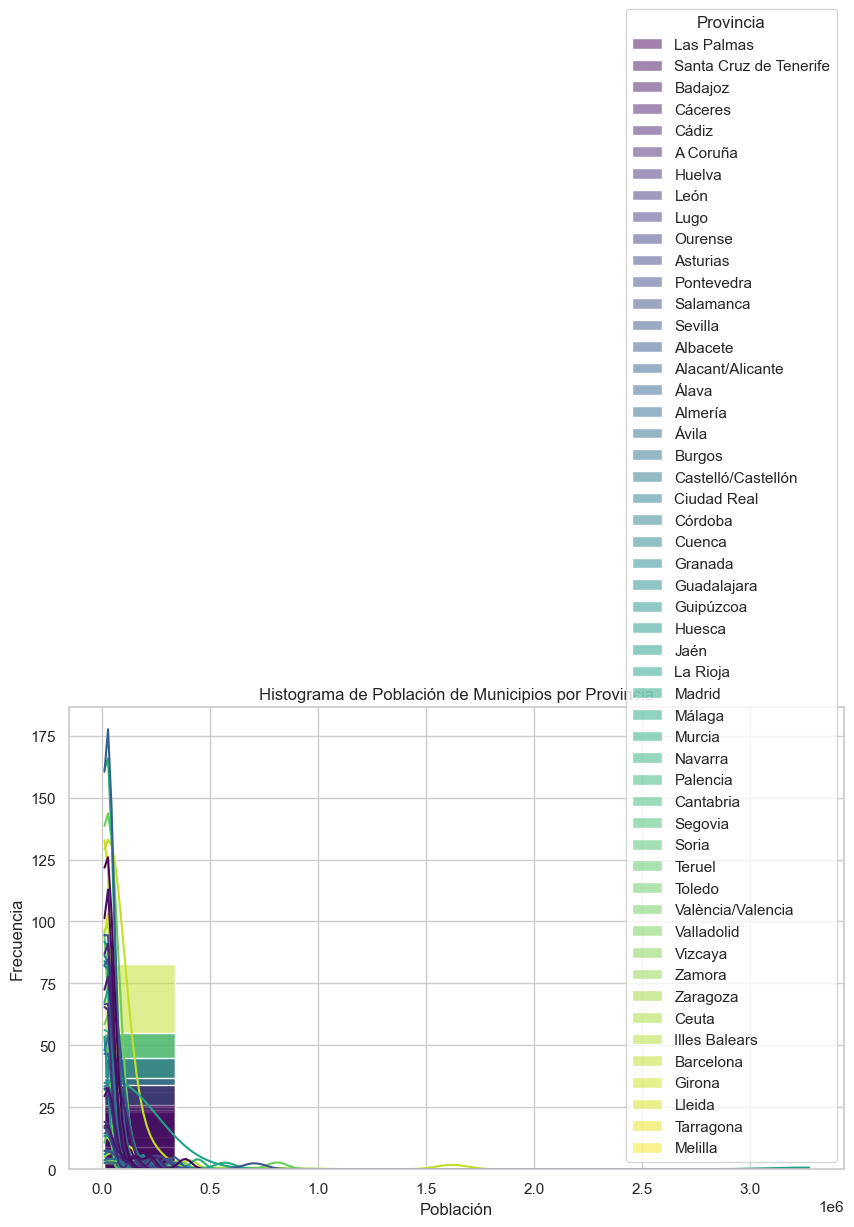

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear un histograma agrupado por provincia
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x="Poblacion", hue="Provincia", kde=True, bins=10, palette="viridis")

# Añadir título y etiquetas
plt.title("Histograma de Población de Municipios por Provincia")
plt.xlabel("Población")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

7) Seleccione al azar cincuenta municipios diferentes de 
entre los diponibles en el archivo. Asegúrese de que no 
se repitan. ¿Luego calcule el promedio de la población y 
la desviación estándar de esto 50 municipios?. 

In [52]:
import pandas as pd

# Seleccionar 50 municipios al azar sin repetición
muestra_50 = dataset.sample(n=50, replace=False, random_state=42)  # random_state para reproducibilidad

# Calcular el promedio y la desviación estándar de la población
promedio_poblacion = muestra_50["Poblacion"].mean()
desviacion_estandar = muestra_50["Poblacion"].std()

# Mostrar los resultados
print(f"Promedio de la población de los 50 municipios: {promedio_poblacion:.2f}")
print(f"Desviación estándar de la población de los 50 municipios: {desviacion_estandar:.2f}")

Promedio de la población de los 50 municipios: 36000.82
Desviación estándar de la población de los 50 municipios: 44560.11
